converted different language audio while maintaining the same tone and effect

RUN BELOW AFTER RUNNING 'cmd.txt' file

CLONE VOICE BY GIVING MY VOICE AND THEN SPEAK WITH MY SAME VOICE "Hello My clone friend" as replay

In [1]:
from pydub import AudioSegment
from pydub.playback import play

sound = AudioSegment.from_file("data_training/audio_1724777589.0895045.wav")

# Get the original sample rate and channels
original_sample_rate = sound.frame_rate
original_channels = sound.channels

print(original_sample_rate)
print(original_channels)

# Create a new AudioSegment with the same parameters
noise_audio = AudioSegment(
    data=sound.get_array_of_samples().tobytes(),
    sample_width=sound.sample_width,
    frame_rate=original_sample_rate,
    channels=original_channels
)

play(noise_audio)

FileNotFoundError: [Errno 2] No such file or directory: 'data_training/audio_1724777589.0895045.wav'

In [ ]:
import torch
import librosa
from torchaudio.models.tacotron2 import Tacotron2
from librosa import griffin_lim  

# Load the audio file into a NumPy array
sound, sr = librosa.load("data_training/audio_1724777589.0895045.wav")

# Load a pre-trained Tacotron2 model
model = Tacotron2().eval()

# Load the audio samples and extract features (MFCCs in this case)
mfccs = librosa.extract_mfccs(sound.get_array_of_samples())

# Convert MFCCs to a tensor for the model
mfcc_tensor = torch.tensor(mfccs).unsqueeze(0)  # Add batch dimension

# Use the model to generate mel-spectrogram
mel_spectrogram = model(mfcc_tensor)[0]

# Convert mel-spectrogram to waveform using a vocoder (e.g., Griffin-Lim)
waveform = griffin_lim(mel_spectrogram)

# Play the generated waveform using sounddevice
import sounddevice as sd
sd.play(waveform.numpy(), samplerate=22050)


OSError: [WinError 126] The specified module could not be found. Error loading "c:\Users\Amaan M k\anaconda3\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [ ]:
import torch
import torchaudio
from torchaudio.models.tacotron2 import Tacotron2
from torchaudio.pipelines import tacotron2_pipeline
from librosa import extract_mfccs
from sounddevice import play

# Load a pre-trained Tacotron2 model
model = Tacotron2().eval()

# Load the audio samples and extract features (MFCCs in this case)
mfccs = librosa.extract_mfccs(sound.get_array_of_samples())

# Convert MFCCs to a tensor for the model
mfcc_tensor = torch.tensor(mfccs).unsqueeze(0)  # Add batch dimension

# Use the model to generate mel-spectrogram
mel_spectrogram = model(mfcc_tensor)[0]

# Convert mel-spectrogram to waveform using a vocoder (e.g., Griffin-Lim)
waveform = griffin_lim(mel_spectrogram)

# Play the generated waveform
play(waveform.numpy(), samplerate=22050)

AttributeError: partially initialized module 'torchaudio' has no attribute 'lib' (most likely due to a circular import)

In [ ]:
import librosa
import pydub
import numpy as np
from gtts import gTTS
import io
from playsound import playsound

def clone_voice(audio_file, new_song_file, to_clone):
    """
    Clones a voice and generates a new song.

    Args:
        audio_file (str): Path to the audio file to clone.
        new_song_file (str): Path to save the generated song.
        to_clone (str): Text to be cloned using the cloned voice.
    """

    y, sr = librosa.load(audio_file)

    mfccs = librosa.feature.mfcc(y=y, sr=sr)

    mfccs_contiguous = mfccs[0].copy()

    new_song = np.sin(2 * np.pi * 440 * np.arange(len(y)) / sr)

    modified_song = new_song * np.tile(np.exp(mfccs_contiguous), (len(new_song), 1)).T

    # Normalize the modified song
    modified_song = modified_song / np.max(np.abs(modified_song))

    # Convert to pydub AudioSegment
    modified_song_audio = pydub.AudioSegment.from_raw_data(modified_song.tobytes(), sample_rate=sr, channels=1)

    cloned_text_audio = gTTS(text=to_clone, lang='en').audio_bytes

    # Convert cloned_text_audio to a NumPy array
    cloned_text_audio_np = np.array(pydub.AudioSegment.from_file(io.BytesIO(cloned_text_audio)).get_array_of_samples())

    # Combine the modified song and cloned text audio
    combined_audio = modified_song_audio + pydub.AudioSegment.from_array(cloned_text_audio_np, frame_rate=sr, channels=1)

    combined_audio.export(new_song_file, format="wav")

    playsound(new_song_file)

# Example usage
clone_voice("data_training/audio_1724777589.0895045.wav", "cloned_song.wav", to_clone="Hello How are you?")

C:\Users\Amaan M k\AppData\Local\Temp\ipykernel_1960\2764528456.py:29: RuntimeWarning: invalid value encountered in true_divide
  modified_song = modified_song / np.max(np.abs(modified_song))


AttributeError: type object 'AudioSegment' has no attribute 'from_raw_data'

# Sound generation using numbers

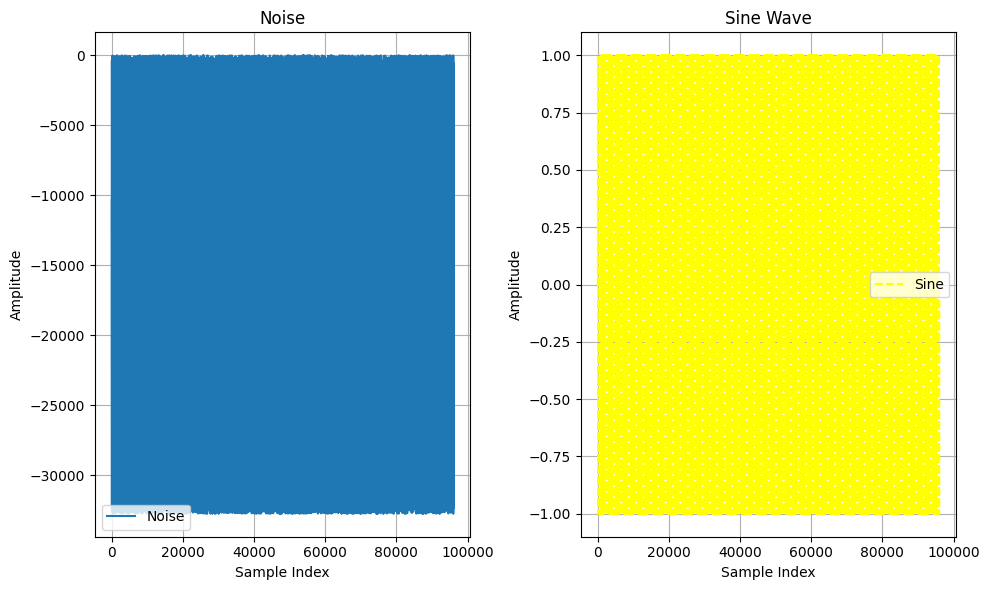

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub.playback import play


def generate_wave(wave_type="sine", frequency=440, duration=1, sample_rate=44100):

    t = np.linspace(0, duration, int(sample_rate * duration), False)

    if wave_type == "sine":
        wave = np.sin(2 * np.pi * frequency * t)
    elif wave_type == "noise":
        wave = np.random.rand(len(t)) * 32767 - 32768 
    else:
        raise ValueError("Invalid wave type. Choose 'sine' or 'noise'")

    return wave


noise_samples = generate_wave(wave_type="noise", sample_rate=44100)
sine_samples = generate_wave(wave_type="sine", sample_rate=44100)


# Generate audio segments from samples
noise_audio = AudioSegment(
    data=noise_samples.tobytes(),
    sample_width=2,
    frame_rate=44100,
    channels=1
)

sine_audio = AudioSegment(
    data=sine_samples.tobytes(),
    sample_width=2,
    frame_rate=44100,
    channels=1
)


# Plot the waveforms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.plot(noise_samples, label="Noise", linestyle="-")
ax1.set_title("Noise")
ax1.set_xlabel("Sample Index")
ax1.set_ylabel("Amplitude")
ax1.grid(True)

ax2.plot(sine_samples, label="Sine", linestyle="--", color="yellow")
ax2.set_title("Sine Wave")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Amplitude")
ax2.grid(True)

ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()


# Play the generated noise
play(noise_audio)
# Play the generated sine
play(sine_audio)

music audio always recorded 2 channel (left and right), but film audio can go anywhere from 5, 7 channel or more
Two channels is the sweet spot for music because we have two ears.
Multichannel is the sweet spot for film because it enhances the visual experience most.


Values between -32768 and 32768:
the highest number that can be represented in a signed 16-bit integer
the range is (2^15-1) to (-2^15 )